In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [2]:
#loading vehicle data
vehdf =  pd.read_csv('vehicle.csv')

In [3]:
#verifying the sample of the data
vehdf.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [4]:
vehdf.shape
#There are 846 rows and 19 columns

(846, 19)

In [5]:
vehdf.describe()
#univariate analysis of data

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

Inference :
    All the feature has mean greater than median . So the data is normally distributed. We could see min , max,25%,75% of the values for each features

In [6]:
vehdf.dtypes
#except class all the other features are in numerical or float values

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

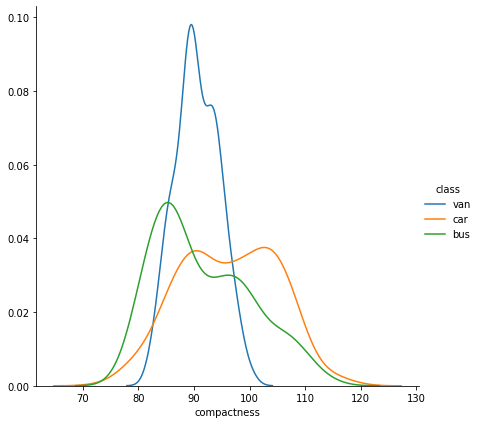

In [7]:
#checking the distribution of data
sns.FacetGrid(vehdf, hue="class", size=6).map(sns.kdeplot, "compactness").add_legend()

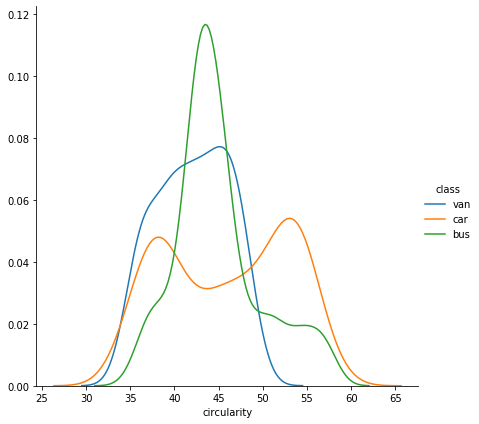

In [8]:
sns.FacetGrid(vehdf, hue="class", size=6).map(sns.kdeplot, "circularity").add_legend()

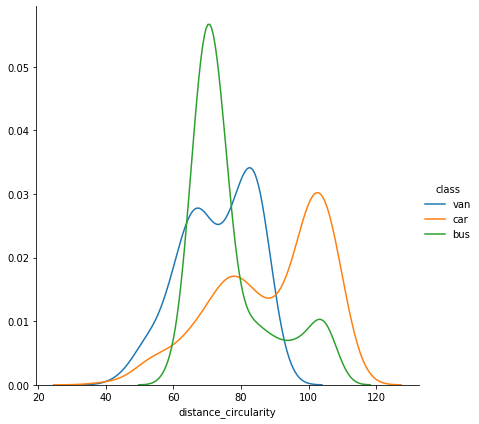

In [9]:
sns.FacetGrid(vehdf, hue="class", size=6).map(sns.kdeplot, "distance_circularity").add_legend()

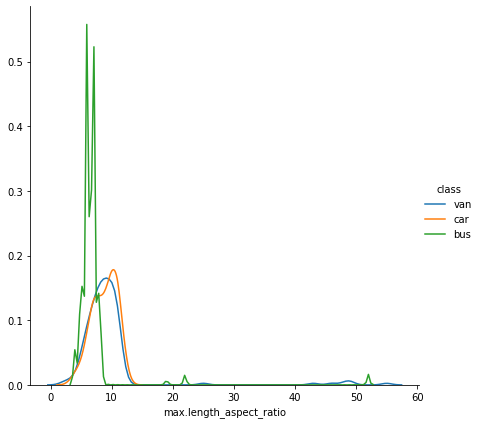

In [10]:
sns.FacetGrid(vehdf, hue="class", size=6).map(sns.kdeplot, "max.length_aspect_ratio").add_legend()

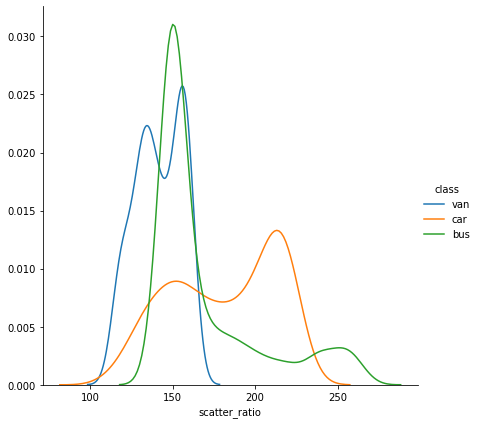

In [11]:
sns.FacetGrid(vehdf, hue="class", size=6).map(sns.kdeplot, "scatter_ratio").add_legend()

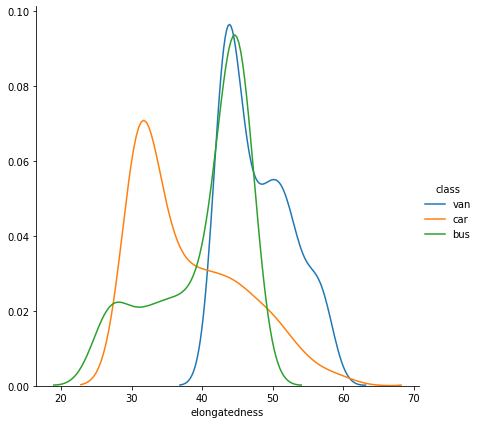

In [12]:
sns.FacetGrid(vehdf, hue="class", size=6).map(sns.kdeplot, "elongatedness").add_legend()

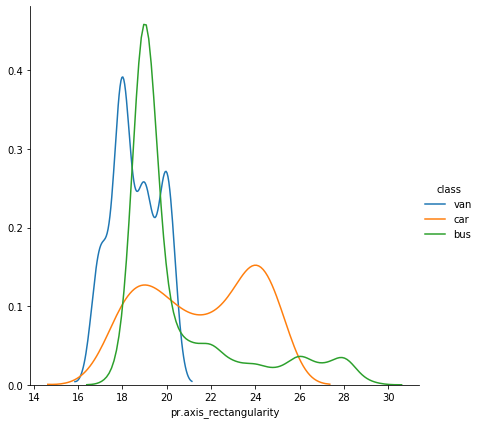

In [13]:
sns.FacetGrid(vehdf, hue="class", size=6).map(sns.kdeplot, "pr.axis_rectangularity").add_legend()

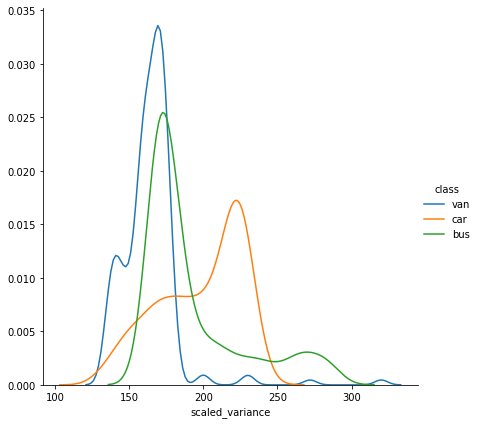

In [14]:
sns.FacetGrid(vehdf, hue="class", size=6).map(sns.kdeplot, "scaled_variance").add_legend()

From the above graph we could not clearly identify the feature which contributes in predicting target variables. From all the feature we could see the separation of different class.
we should perform statistical test to find the relation between feature and target

In [15]:
vehdf.groupby(['class']).count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            218          214                   215           216   
car            429          428                   429           426   
van            199          199                   198           198   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     217                      218            218   
car                     428                      429            428   
van                     199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              218                     217                        218   
car              428                     428                        429   
van              199                     198                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                218                218                        216   
car                427                427                        429   
van                198                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            217             214               218   
car                            426             427               428   
van                            199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
bus                 218            218  
car                 428            429  
van                 199            199

From the count of class distribution we can infer that imbalance of the data classification

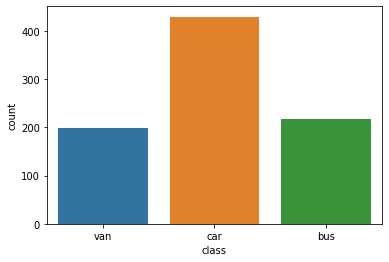

In [16]:
sns.countplot(vehdf['class'])

In [17]:
#we could observe that car class has maximum number of distribution
#The distribution of class are in ratio 2:1:1

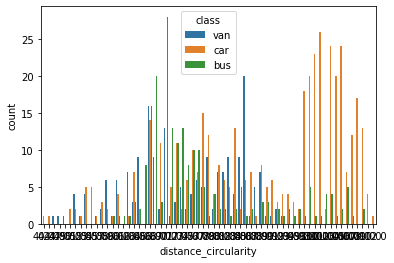

In [18]:
sns.countplot(x="distance_circularity", data=vehdf, hue="class")

In [19]:
#from the above countplot we could observe that car class is equally distributed in diferent ranges of distance_circularity
#bus varies from middle to higher range of distance_circularity and van varies in the middle range

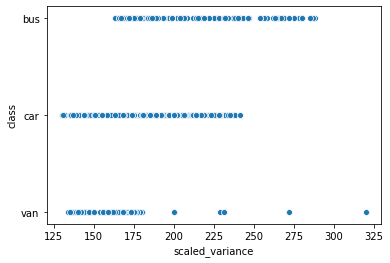

In [20]:
sns.scatterplot(x = vehdf['scaled_variance'] , y =vehdf['class'])

In [21]:
# We could observe that for the lower value of scaled_varinace the vehicles are classfiied to van and with increase in value they belong to car and bus except for few outliers in the van class
#Scaled variance could be good feature in predicting the target varaibales

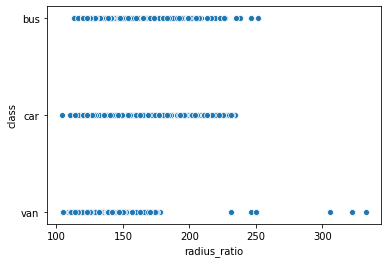

In [22]:
sns.scatterplot(x = vehdf['radius_ratio'] , y =vehdf['class'])

In [23]:
# from the above scatter plot we could not differentiate classification of vehicle at the lower value of radius_ratio but with increase in value there is separation in the vehicle classification.
#this may  be a good feature in predicting the class

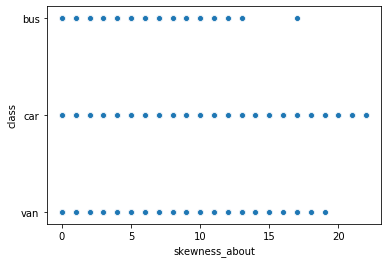

In [24]:
sns.scatterplot(x = vehdf['skewness_about'] , y =vehdf['class'])

In [25]:
#from the above we can infer that skewness_about is not a very good feature in predicting the class.

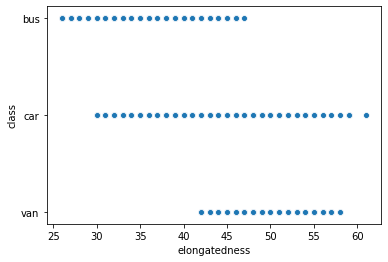

In [26]:
sns.scatterplot(x = vehdf['elongatedness'] , y =vehdf['class'])

In [27]:
#elongatedness is the good feature in predicting the class. We could see clear separation in the classification of data. for the lower value it belongs to bus class and with increase in value it belongs to car and with the value above 42 it belongs to van class

In [28]:
vehdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [29]:
vehdf.apply(pd.Series.nunique)
#The number of unique values in each feature

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

In [30]:
vehdf.isna().sum()
#checking for null values

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [31]:
vehdf['compactness'].unique()

array([ 95,  91, 104,  93,  85, 107,  97,  90,  86,  88,  89,  94,  96,
        99, 101,  84,  87,  83, 102,  80, 100,  82, 106,  81, 119,  78,
        92,  98, 103,  77,  73,  79, 110, 108, 109, 111, 105, 112, 116,
       113, 117, 115,  76, 114], dtype=int64)

In [32]:
vehdf['circularity'].unique()

array([48., 41., 50., 44., nan, 43., 34., 36., 46., 42., 49., 55., 54.,
       56., 47., 37., 39., 53., 45., 38., 35., 40., 59., 52., 51., 58.,
       57., 33.])

In [33]:
vehdf['distance_circularity'].unique()

array([ 83.,  84., 106.,  82.,  70.,  73.,  66.,  62.,  98.,  74.,  85.,
        79., 103.,  51.,  77., 100.,  75.,  53.,  64., 105.,  80.,  54.,
        63., 107.,  nan,  72.,  86.,  68., 104.,  87.,  76.,  81.,  71.,
       101.,  96.,  78., 108.,  91.,  89.,  94.,  92.,  60.,  57.,  65.,
        50.,  88., 109.,  95.,  90.,  58.,  69.,  47.,  40.,  59., 110.,
        93., 102., 112.,  61.,  42.,  49.,  44.,  52.,  55.])

In [34]:
vehdf['radius_ratio'].unique()

array([178., 141., 209., 159., 205., 172., 173., 157., 140.,  nan, 143.,
       136., 171., 144., 203., 201., 109., 197., 186., 215., 153., 121.,
       148., 219., 154., 119., 193., 129., 160., 151., 222., 177., 118.,
       306., 176., 169., 214., 105., 137., 183., 220., 145., 133., 122.,
       147., 115., 174., 228., 175., 185., 195., 221., 212., 135., 120.,
       156., 125., 164., 161., 227., 191., 111., 170., 113., 127., 188.,
       180., 116., 158., 162., 211., 152., 124., 252., 150., 130., 198.,
       202., 199., 128., 142., 163., 155., 184., 165., 322., 194., 218.,
       216., 223., 149., 131., 139., 179., 166., 187., 167., 231., 168.,
       126., 206., 210., 110., 189., 134., 132., 230., 196., 208., 138.,
       200., 225., 246., 207., 192., 117., 123., 146., 190., 182., 204.,
       224., 333., 213., 226., 238., 181., 114., 104., 112., 234., 235.,
       250., 232., 217.])

In [35]:
vehdf['pr.axis_aspect_ratio'].unique()

array([ 72.,  57.,  66.,  63., 103.,  50.,  65.,  61.,  62.,  55.,  68.,
        58.,  71.,  52.,  69.,  nan,  64.,  59.,  67., 126.,  54.,  73.,
        51.,  70.,  53.,  56.,  74.,  60.,  76.,  75.,  49., 133.,  47.,
       102., 138.,  48.,  97., 105.])

In [36]:
vehdf['max.length_aspect_ratio'].unique()

array([10,  9, 52,  6,  7, 11,  5,  8, 49, 12, 22, 48,  4, 13,  3, 43, 25,
       46, 19,  2, 55], dtype=int64)

In [37]:
vehdf['scatter_ratio'].unique()

array([162., 149., 207., 144., 255., 153., 137., 122., 183., 133., 123.,
       152., 174., 204., 118., 177., 216., 208., 154., 150., 143., 147.,
       128., 218., 192., 146., 155., 140., 142., 164., 157., 151., 205.,
       119., 158., 213., 159., 130., 148., 156., 163., 210., 257., 185.,
       209., 193., 184., 225., 190., 215., 224., 176., 126., 195., 172.,
       127., 261., 171., 125., 169., 197., 145., 214., 201., 114., 194.,
       220., 221., 173., 134., 160., 121., 199., 186., 161., 222., 136.,
       187., 250., 202., 166., 132., 211., 247., 116., 203., 181., 240.,
       219., 212., 138., 131., 117., 112., 165.,  nan, 226., 129., 175.,
       135., 217., 200., 241., 198., 120., 260., 188., 170., 234., 236.,
       168., 167., 227., 139., 256., 206., 141., 238., 178., 223., 252.,
       239., 115., 191., 179., 251., 262., 196., 180., 189., 237., 265.])

In [38]:
vehdf['elongatedness'].unique()

array([42., 45., 32., 46., 26., 48., 54., 36., 50., 43., 44., 37., 57.,
       31., 55., 53., 33., 47., 40., 51., 34., 52., 35., 30., 38., 56.,
       39., 58., 59., 49., 27., 41., nan, 61., 28., 29.])

In [39]:
vehdf['pr.axis_rectangularity'].unique()

array([20., 19., 23., 28., 18., 17., 22., 21., 24., 25., nan, 27., 26.,
       29.])

In [40]:
vehdf['max.length_rectangularity'].unique()

array([159, 143, 158, 144, 169, 146, 127, 130, 118, 148, 154, 166, 129,
       139, 173, 145, 125, 142, 136, 165, 167, 151, 128, 150, 147, 156,
       171, 162, 134, 160, 141, 163, 133, 168, 135, 161, 137, 178, 175,
       186, 132, 138, 152, 153, 122, 157, 140, 174, 124, 164, 172, 170,
       131, 123, 149, 126, 155, 176, 180, 119, 177, 121, 182, 179, 188,
       120], dtype=int64)

In [41]:
vehdf['scaled_variance'].unique()

array([176., 170., 223., 160., 241., 280., 162., 141., 202., 153., 148.,
       180., 173., 196., 227., 137., 225., 175., 169., 164., 221., 143.,
       229., 217., 168., 165., 232., 186., 174., 272., 235., 135., 178.,
       191., 159., 172., 184., 181., 236., 275., 154., 222., 214., 145.,
       203., 231., 208., 226., 210., 197., 171., 155., 278., 189., 142.,
       218., 179., 166., 237.,  nan, 212., 177., 167., 132., 151., 216.,
       219., 157., 224., 188., 161., 207., 156., 152., 220., 266., 228.,
       185., 209., 204., 182., 200., 258., 146., 183., 163., 238., 194.,
       134., 206., 136., 130., 190., 158., 147., 140., 265., 211., 138.,
       247., 288., 234., 243., 256., 195., 213., 187., 205., 262., 320.,
       285., 215., 150., 139., 267., 149., 193., 230., 254., 269., 264.,
       199., 192., 144., 131., 246., 287., 240., 263.])

In [42]:
vehdf['scaled_variance.1'].unique()

array([ 379.,  330.,  635.,  309.,  325.,  957.,  361.,  281.,  223.,
        505.,  266.,  224.,  349.,  345.,  465.,  624.,  206.,  485.,
        686.,  651.,  354.,  221.,  344.,  307.,  623.,  324.,  238.,
        696.,  570.,  314.,  356.,  293.,  304.,  641.,  402.,  363.,
        340.,  346.,  691.,  336.,  628.,  207.,  366.,  405.,  675.,
        371.,  253.,  317.,  352.,  404.,  299.,  355.,  661.,  341.,
        956.,  265.,  512.,  653.,  241.,  567.,  247.,  269.,  333.,
        523.,  323.,  748.,  305.,  558.,  683.,  732.,  466.,  227.,
        338.,  571.,  445.,  666.,  328.,  343.,  671.,  242.,  311.,
        342.,  998.,  209.,  446.,  229.,  703.,  430.,  583.,  312.,
        308.,  337.,  602.,  321.,  326.,  347.,  246.,  194.,  576.,
        711.,  575.,  331.,  329.,  524.,  357.,  315.,  192.,  351.,
        611.,  712.,  463.,  370.,  319.,  216.,  365.,  605.,  578.,
        511.,  261.,  669.,  364.,  264.,  230.,  373.,  320.,  670.,
        406.,  728.,

In [43]:
vehdf['scaled_radius_of_gyration'].unique()

array([184., 158., 220., 127., 188., 264., 172., 164., 112., 152., 118.,
       192., 161., 206., 246., 125., 151., 223., 133., 177., 141., 224.,
       174., 139., 216., 163., 120., 204., 130., 200., 218., 186., 202.,
       232., 189., 156., 179., 146., 245., 165., 230., 119., 176., 212.,
       142., 185., 159., 183., 171., 209., 221., 147., 210., 173., 214.,
       116., 144., 148., 257., 162., 129., 132., 229., 155., 234., 170.,
       201., 150., 137., 167., 143., 187., 136., 138., 194., 153., 157.,
       198., 131., 168., 134., 145., 115., 178., 199., 195., 154., 149.,
       239., 140., 180., 217., 124., 190., 242., 169., 135., 166., 238.,
       121., 128., 191., 123., 219., 181.,  nan, 213., 175., 197., 211.,
       126., 249., 203., 205., 160., 222., 247., 226., 261., 231., 236.,
       253., 235., 182., 262., 193., 117., 250., 196., 243., 113., 228.,
       240., 241., 244., 109., 207., 268., 260., 215., 208., 237., 255.,
       114.])

In [44]:
vehdf['scaled_radius_of_gyration.1'].unique()

array([ 70.,  72.,  73.,  63., 127.,  85.,  66.,  67.,  64.,  65.,  71.,
        74.,  80.,  75.,  82.,  68.,  69.,  76.,  83., 118.,  86.,  77.,
        88.,  62.,  79.,  78.,  nan,  81.,  87., 119.,  97.,  60.,  61.,
        89.,  90.,  84., 135.,  91.,  59.,  99.])

In [45]:
vehdf['skewness_about'].unique()

array([ 6.,  9., 14.,  5., 13.,  3.,  2.,  4.,  8.,  0.,  7.,  1., 10.,
       17., 20., 18., nan, 11., 16., 21., 12., 22., 15., 19.])

In [46]:
vehdf['skewness_about.2'].unique()

array([187., 189., 188., 199., 180., 181., 200., 193., 195., 194., 196.,
       197., 186., 198., 185., 179., 192., 191., 190., 183., 184., 202.,
       201., 182., 176., 178., 203., 177.,  nan, 204., 206.])

From the unique values we could see there are null values in multiple features. We should treat these missing values with mean, mode or median

In [47]:
#converting class into numerical format using labelencoder. We can use onehotencoding as well here
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
vehdf['class'] = le.fit_transform(vehdf['class'])


In [48]:
vehdf.mean()

compactness                     93.678487
circularity                     44.828775
distance_circularity            82.110451
radius_ratio                   168.888095
pr.axis_aspect_ratio            61.678910
max.length_aspect_ratio          8.567376
scatter_ratio                  168.901775
elongatedness                   40.933728
pr.axis_rectangularity          20.582444
max.length_rectangularity      147.998818
scaled_variance                188.631079
scaled_variance.1              439.494076
scaled_radius_of_gyration      174.709716
scaled_radius_of_gyration.1     72.447743
skewness_about                   6.364286
skewness_about.1                12.602367
skewness_about.2               188.919527
hollows_ratio                  195.632388
class                            0.977541
dtype: float64

In [49]:
vehdf.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [50]:
vehdf.duplicated().sum()
#There are no duplicates observerd in the dataframe

0

In [51]:
#verifying individual distribution of data

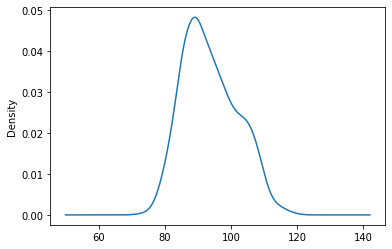

In [52]:
vehdf['compactness'].plot(kind='kde')

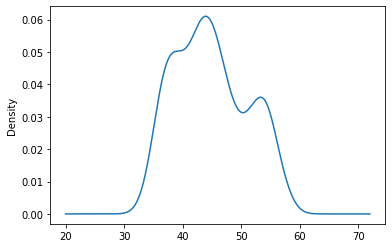

In [53]:
vehdf['circularity'].plot(kind='kde')

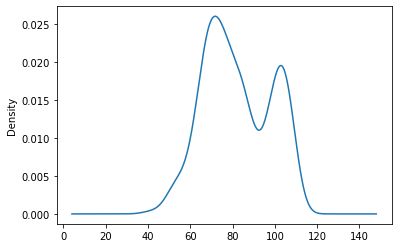

In [54]:
vehdf['distance_circularity'].plot(kind='kde')

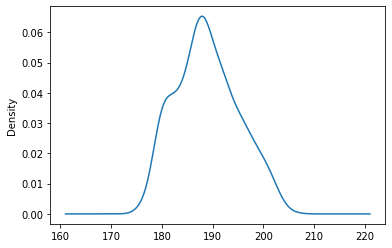

In [55]:
vehdf['skewness_about.2'].plot(kind='kde')

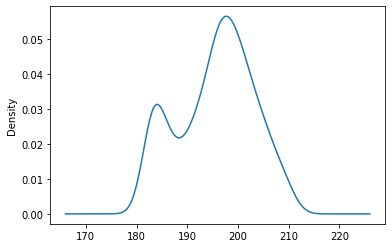

In [56]:
vehdf['hollows_ratio'].plot(kind='kde')

In [57]:
#from the above graph we could infer that there are minimum 3 class in the distribution and each of the feature is normally distributed
#Also we could see some skwness toward left and right with some outliers in radius_ratio,pr.axis_aspect_ratio, max_length_aspect_ratio,scaled_variance1,scaled_radius_of_gyration,skweness_About,skewenss_about1


In [58]:
#treating the missing value in the data

imputer = preprocessing.Imputer(missing_values='NaN', strategy='median')
imputer
imputer = imputer.fit(vehdf)
vendfimputedmedian = imputer.transform(vehdf)
vehdfimpmedian = pd.DataFrame(vendfimputedmedian , columns = ['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio','class' ])

In [59]:
#verifying null values after imputation
vehdfimpmedian.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

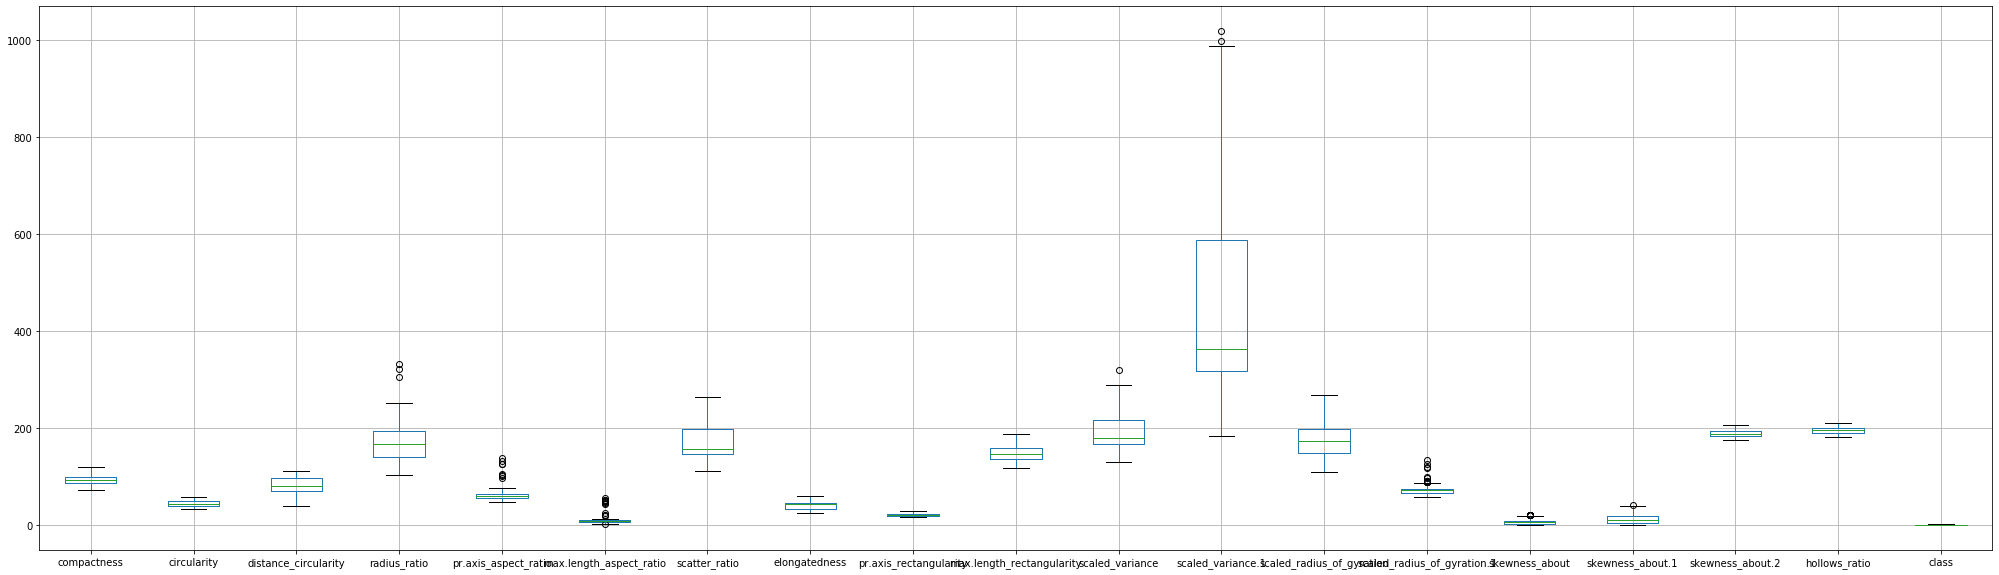

In [60]:
vehdfimpmedian.boxplot(figsize=(35,10))

In [61]:
#we could observer outliers in radius_ratio,pr.axis_aspect_ratio, max_length_aspect_ratio,scaled_variance1,scaled_radius_of_gyration,skweness_About,skewenss_about1
#these outliers should be treated

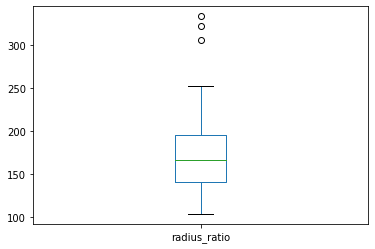

In [62]:
vehdfimpmedian['radius_ratio'].plot(kind='box')

In [63]:
#treating outliers

In [64]:
(vehdf['radius_ratio'] >= 300 ).sum()

3

In [65]:
vehdfimpmedian['radius_ratio'] = np.where(vehdfimpmedian['radius_ratio'] >= 300,vehdfimpmedian['radius_ratio'] .median() , vehdfimpmedian['radius_ratio'] )


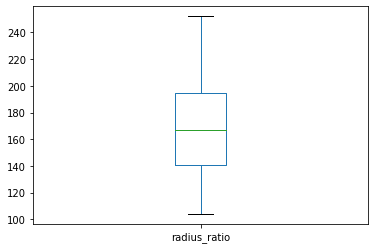

In [66]:
vehdfimpmedian['radius_ratio'].plot(kind='box')

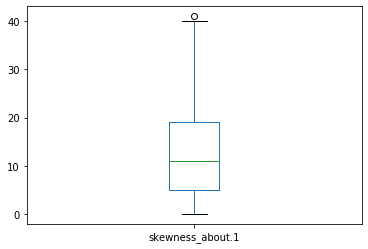

In [67]:
vehdfimpmedian['skewness_about.1'].plot(kind='box')

In [68]:
vehdfimpmedian['skewness_about.1'] = np.where(vehdfimpmedian['skewness_about.1'] >= 40,vehdfimpmedian['skewness_about.1'].median(), vehdfimpmedian['skewness_about.1'] )


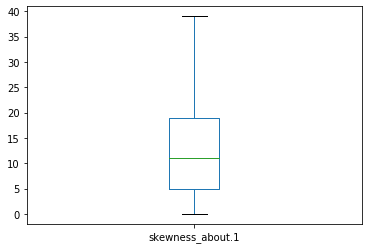

In [69]:
vehdfimpmedian['skewness_about.1'].plot(kind='box')

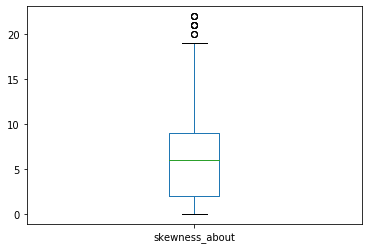

In [70]:
vehdfimpmedian['skewness_about'].plot(kind='box')

In [71]:
vehdfimpmedian['skewness_about'] = np.where(vehdfimpmedian['skewness_about'] >= 18,vehdfimpmedian['skewness_about'].median(), vehdfimpmedian['skewness_about'] )


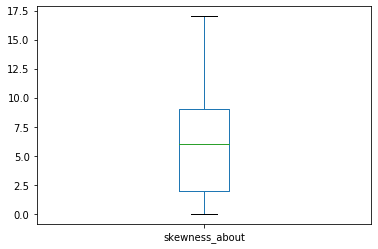

In [72]:
vehdfimpmedian['skewness_about'].plot(kind='box')

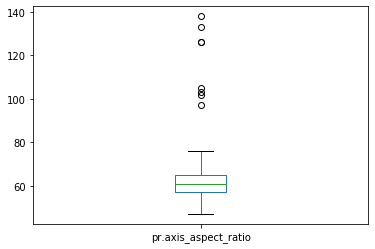

In [73]:
vehdfimpmedian['pr.axis_aspect_ratio'].plot(kind='box')

In [74]:
vehdfimpmedian['pr.axis_aspect_ratio'] = np.where((vehdfimpmedian['pr.axis_aspect_ratio'] >=95), vehdfimpmedian['pr.axis_aspect_ratio'].median() , vehdfimpmedian['pr.axis_aspect_ratio'] )


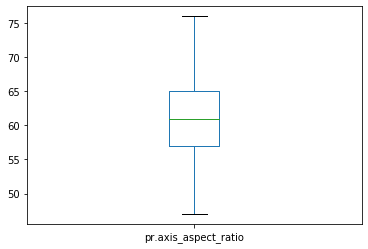

In [75]:
vehdfimpmedian['pr.axis_aspect_ratio'].plot(kind='box')

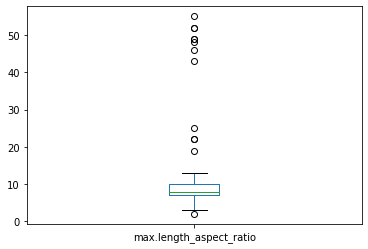

In [76]:
vehdfimpmedian['max.length_aspect_ratio'].plot(kind='box')

In [77]:
vehdfimpmedian['max.length_aspect_ratio'] = np.where(((vehdfimpmedian['max.length_aspect_ratio'] >= 16) | (vehdfimpmedian['max.length_aspect_ratio'] <= 2  )), vehdfimpmedian['max.length_aspect_ratio'].median() , vehdfimpmedian['max.length_aspect_ratio'] )


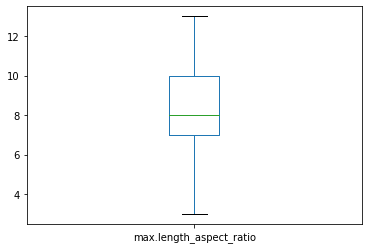

In [78]:
vehdfimpmedian['max.length_aspect_ratio'].plot(kind='box')

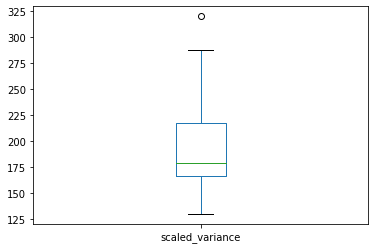

In [79]:
vehdfimpmedian['scaled_variance'].plot(kind='box')

In [80]:
vehdfimpmedian['scaled_variance'] = np.where((vehdfimpmedian['scaled_variance']>=300 ), vehdfimpmedian['scaled_variance'].median(),vehdfimpmedian['scaled_variance'] )

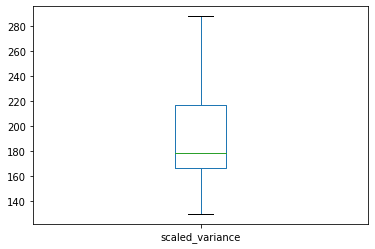

In [81]:
vehdfimpmedian['scaled_variance'].plot(kind='box')

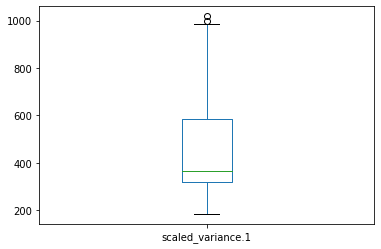

In [82]:
vehdfimpmedian['scaled_variance.1'].plot(kind='box')

In [83]:
vehdfimpmedian['scaled_variance.1'] = np.where((vehdfimpmedian['scaled_variance.1']>= 950 ), vehdfimpmedian['scaled_variance.1'].median(),vehdfimpmedian['scaled_variance.1'] )

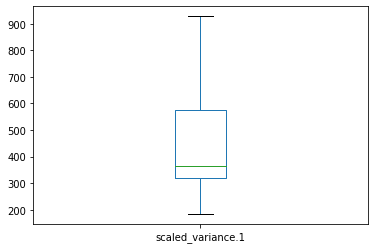

In [84]:
vehdfimpmedian['scaled_variance.1'].plot(kind='box')

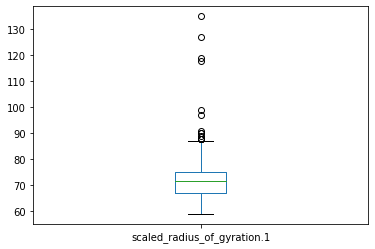

In [85]:
vehdfimpmedian['scaled_radius_of_gyration.1'].plot(kind='box')

In [86]:
vehdfimpmedian['scaled_radius_of_gyration.1'] = np.where((vehdfimpmedian['scaled_radius_of_gyration.1'] >= 85), vehdfimpmedian['scaled_radius_of_gyration.1'].median() , vehdfimpmedian['scaled_radius_of_gyration.1'] )


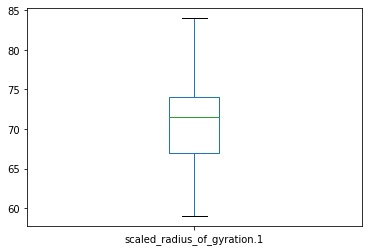

In [87]:
vehdfimpmedian['scaled_radius_of_gyration.1'].plot(kind='box')

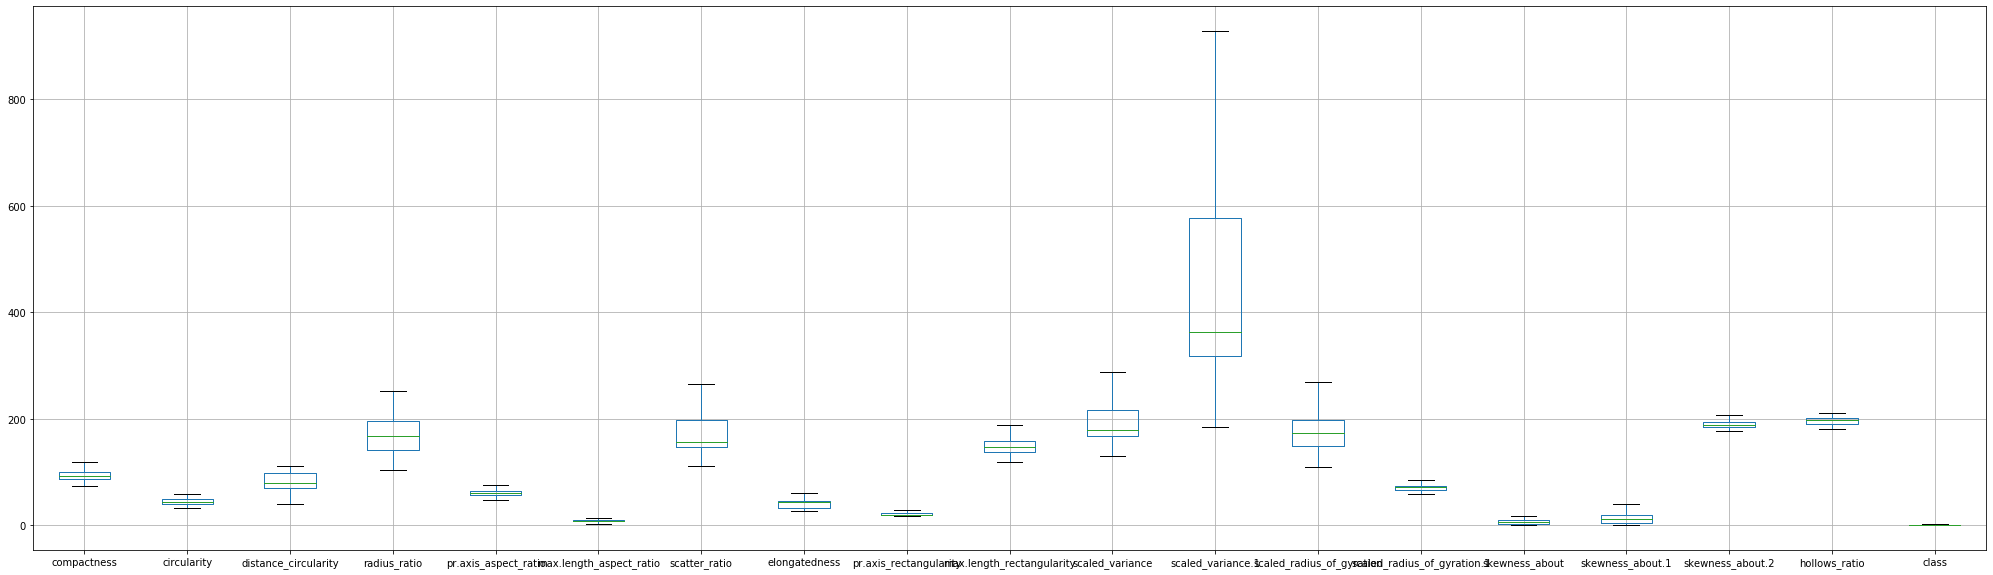

In [88]:
vehdfimpmedian.boxplot(figsize = (35,10))

In [89]:
#we could notice that outliers are removed from the data

In [90]:
#We should find the best feature in predicting the class of the dataset
#using correlation map and pairplot to find the best feature

In [91]:
#bivariate analysis



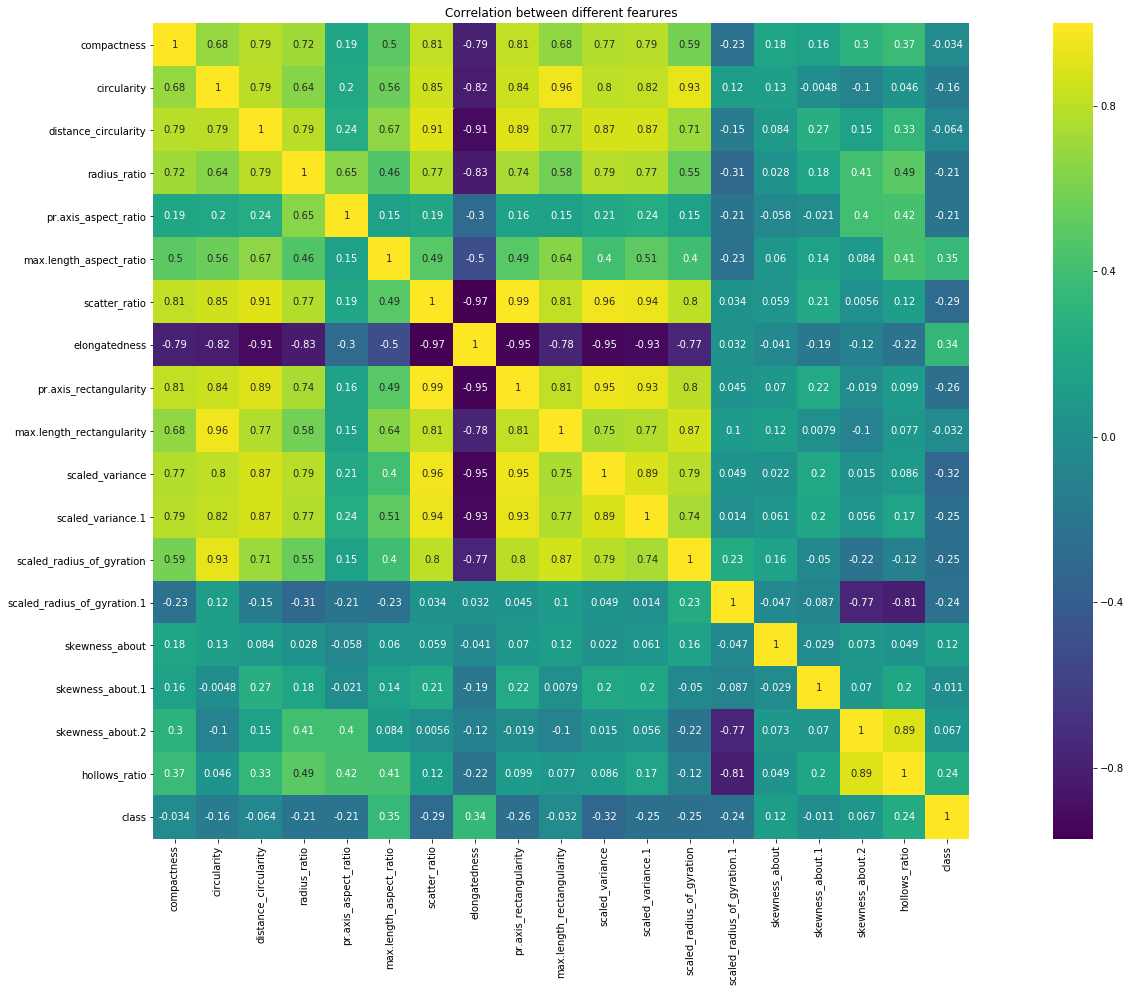

In [92]:
plt.figure(figsize=(30,15))
sns.heatmap(vehdfimpmedian.corr(), vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different fearures')
plt.show();

1.We could find high correlation between max_length_rectangularity and circularity 
2. elongatedness and pr.axis_rectangularity, 
3. elongatedness and scaled_variance, 
4. elongatedness and scaled_variance.1
5. scatter_ratio and scaled_variance.
6. scatter_ratio and distance_circularity
7. hollows_ratio and skweness_about.2
8. Scaled_radius_of_gyration and circularity
9. Max_length_rectangularity and circularity
9. pr.axis_rectandulairy and scaled_variance, 
10. pr.axis_rectandulairy and scaled_variance.1, 
havingly highly correlated independent variables may lead to redundancy in getting accuracy.which should be treated by PCA.

we will find out the best features using statistical test to find relation between feature and target
Also we will use feature selection as well use Randomforestclassifier to identify the best feature

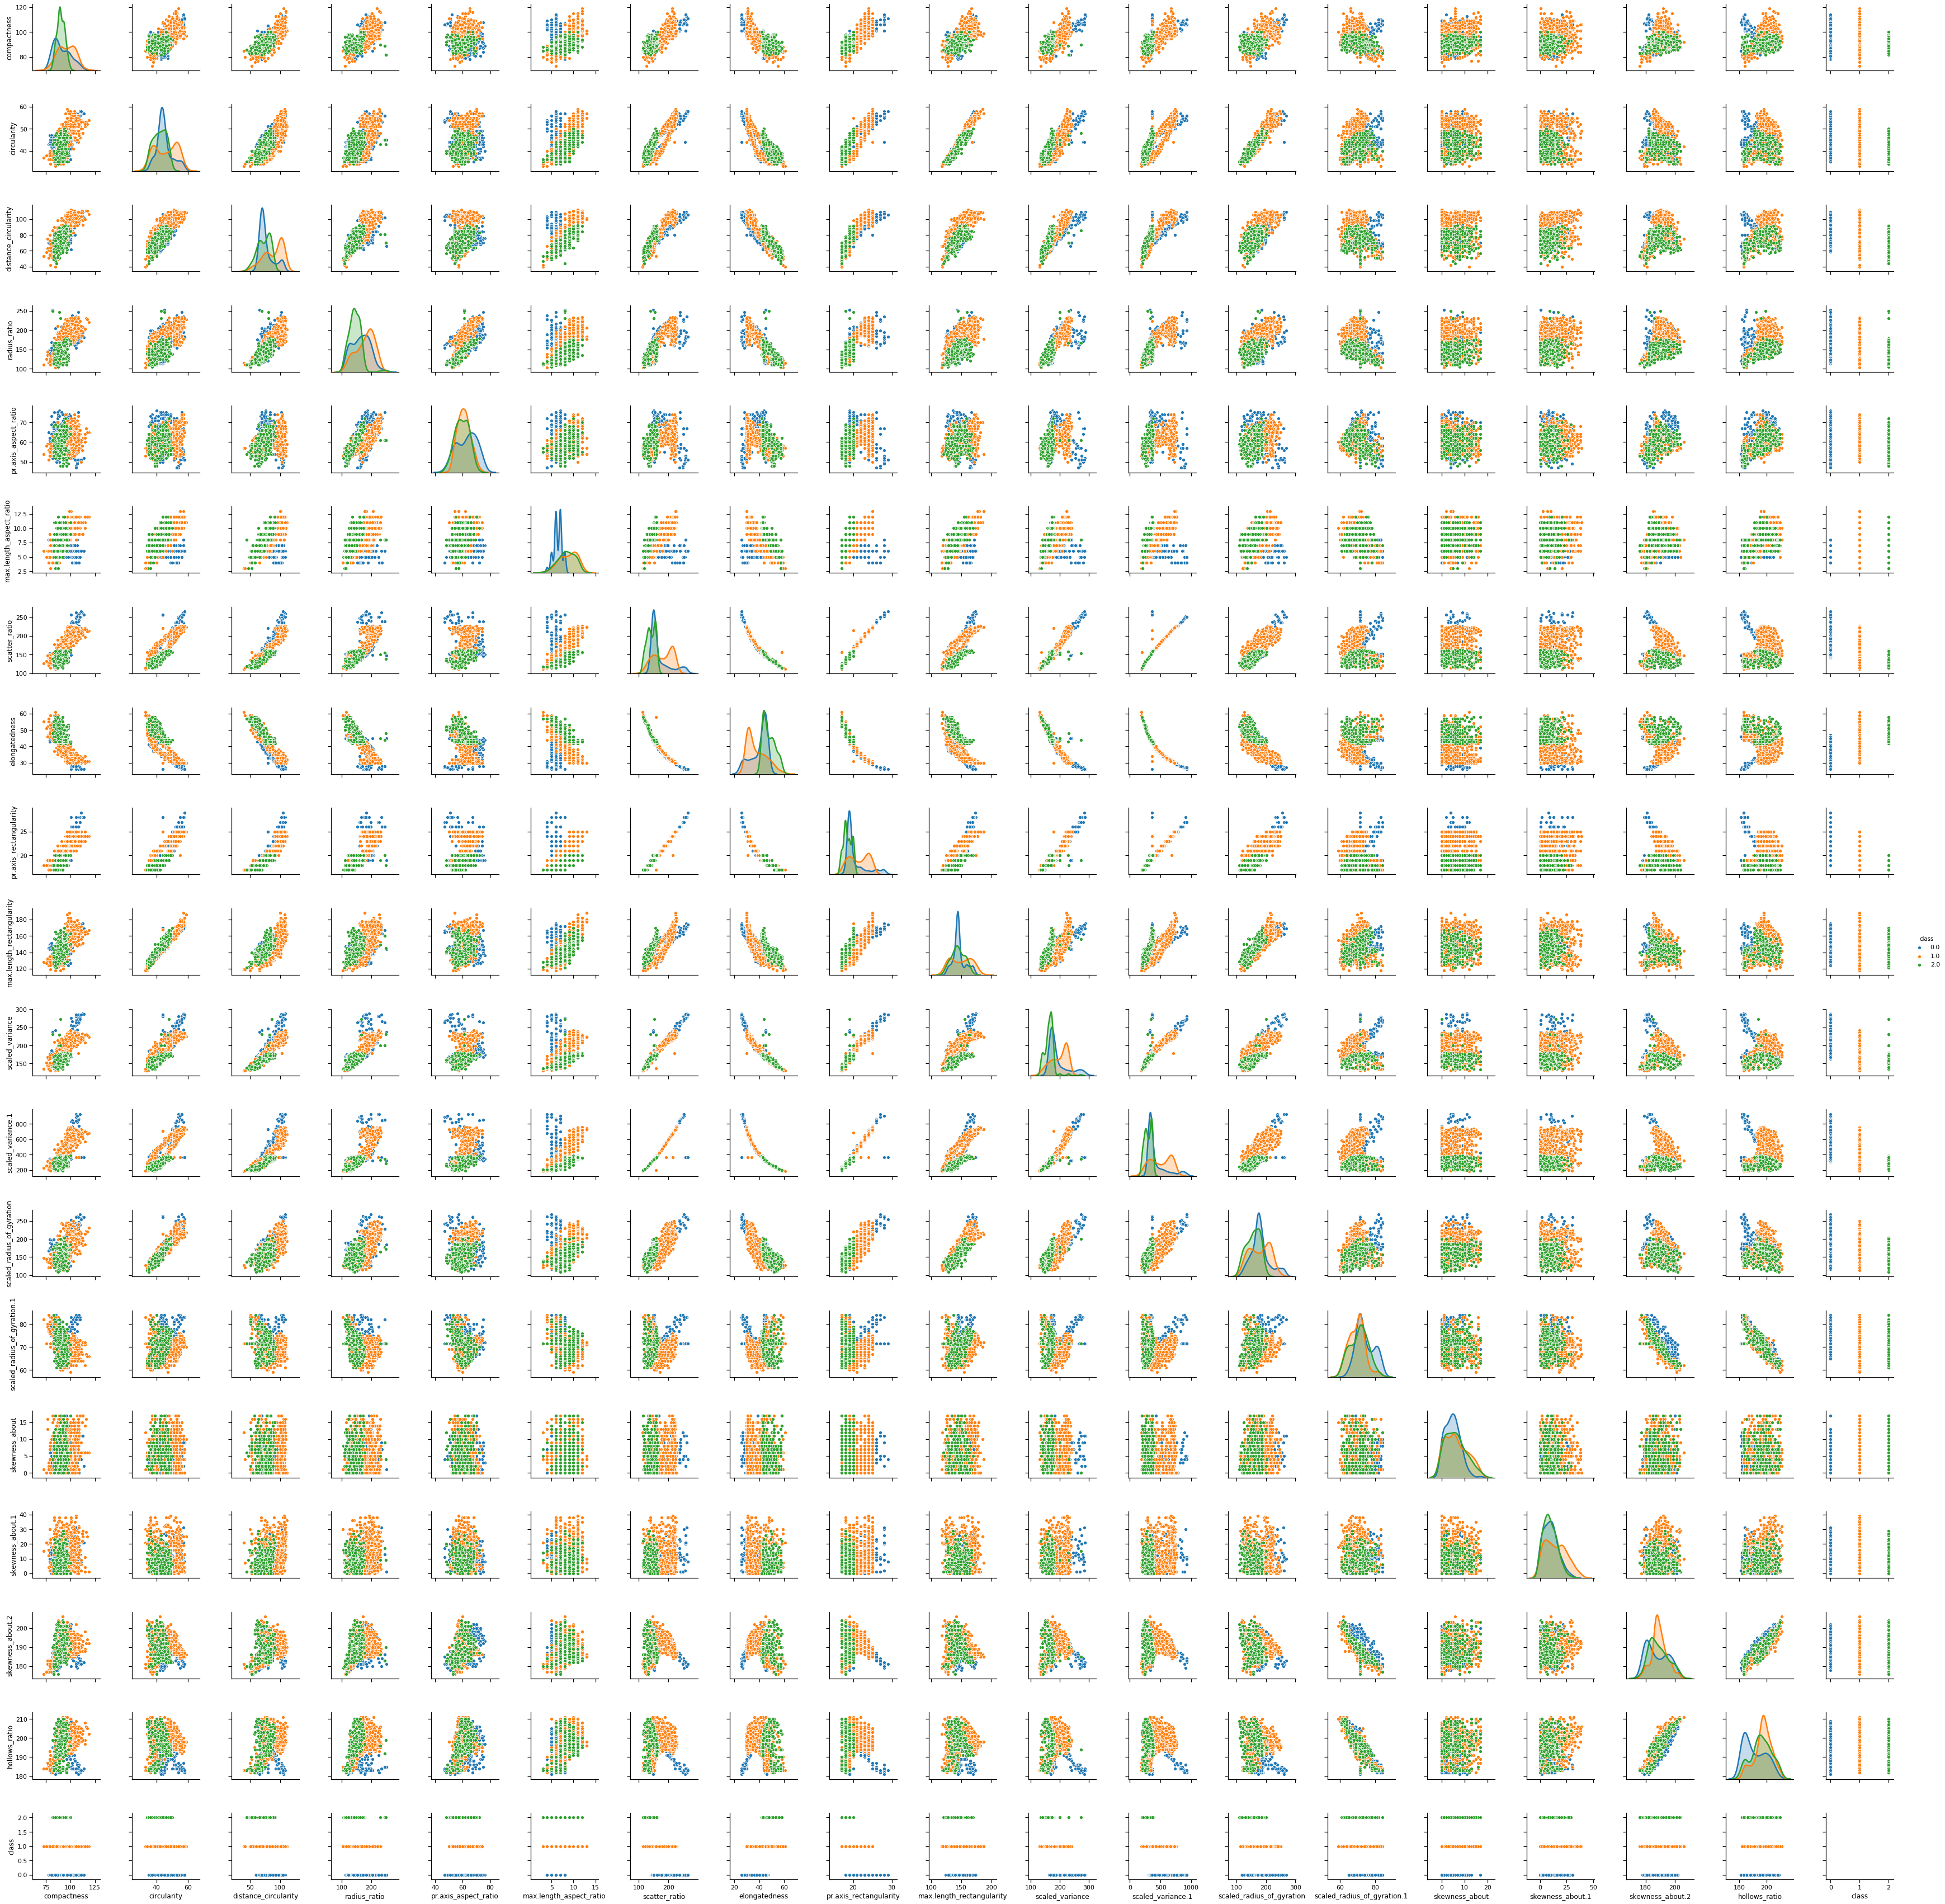

In [899]:
sns.pairplot(data = vehdfimpmedian , hue='class')

In [92]:
#scatter ratio and and scaled variance are highly positively correlated. we can select one of the feature between these in predicting the class

In [93]:
#forming X and Y variable with independent and dependent features
#using outlier and missing values treated data
X = vehdfimpmedian.drop(['class'], axis =1 )
y=vehdfimpmedian['class']

### We would be performing below operations to get the model accuracy
 1. Check the accuracy score without PCA and full features
 2.Predict model accuracy with PCA and full features
 3 .Perform statistical test to identify the best feature
 4. Try to predict the features manually
 4.Use randomforest classifier to predict the best feature, perform PCA and use SVM to predict the model accuracy
 5.Use feature selection to predict the best feature and build SVM model to predict the model accuracy
 

### Approach1 : Verifying the model score without PCA and with full features

In [94]:
#predicting model score without PCA and with full features
#splitting training and test data in 70 , 30 % ratio
X_train , X_testn, y_train , y_testn = train_test_split(X, y, test_size = 0.30 ,random_state = 1)
clf = SVC()
#scaling the trained data
sc = StandardScaler()
X_train_sclaed = sc.fit_transform(X_train)

In [95]:
clf.fit(X_train_sclaed, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [96]:
clf.score(X_testn,y_testn)


0.5236220472440944

### The model performed poorly without PCA .The model accuracy is 52%. We need to reduce the noise and multicolinearity using PCA and properly selected features.

Using statistical test to find the best feature in predicting the class. using f_classify to predict the P-value to reject or accept null

In [97]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

sc = StandardScaler()
X_std1 =  sc.fit_transform(X) 
sel = f_classif(X_std1,y)
#the above array has returned F1 score and second array has returned p-values. We should build our model with p-value less than 0.05
#lets find out the p-value
sel

(array([ 45.4281313 ,  30.37583357, 103.51809333, 104.59781895,
         19.5429374 , 131.42698707, 124.27395681, 147.19385035,
        108.98797371,   8.73541912, 109.15774069, 128.77087465,
         40.9846107 ,  67.52756671,  11.30251917,  37.92113991,
          5.3101594 ,  58.83922074]),
 array([1.83352868e-19, 1.82651074e-13, 6.29107027e-41, 2.64636179e-41,
        5.05233352e-09, 2.07829485e-50, 5.02667575e-48, 1.48210273e-55,
        7.96963160e-43, 1.75805619e-04, 6.96411995e-43, 1.58188013e-49,
        1.03198519e-17, 6.28313250e-28, 1.43231084e-05, 1.69923542e-16,
        5.10779045e-03, 1.20137006e-24]))

In [98]:
p_value = pd.Series(sel[1])
p_value

0     1.833529e-19
1     1.826511e-13
2     6.291070e-41
3     2.646362e-41
4     5.052334e-09
5     2.078295e-50
6     5.026676e-48
7     1.482103e-55
8     7.969632e-43
9     1.758056e-04
10    6.964120e-43
11    1.581880e-49
12    1.031985e-17
13    6.283133e-28
14    1.432311e-05
15    1.699235e-16
16    5.107790e-03
17    1.201370e-24
dtype: float64

In [99]:
p_value[p_value < 0.01]

0     1.833529e-19
1     1.826511e-13
2     6.291070e-41
3     2.646362e-41
4     5.052334e-09
5     2.078295e-50
6     5.026676e-48
7     1.482103e-55
8     7.969632e-43
9     1.758056e-04
10    6.964120e-43
11    1.581880e-49
12    1.031985e-17
13    6.283133e-28
14    1.432311e-05
15    1.699235e-16
16    5.107790e-03
17    1.201370e-24
dtype: float64

From the statistical test we could find the p-value is less than 0.01 which signifies that all the attributes plays a significat role in determining feature.So using PCA to determine the accuracy using SVM with all the features


### Approach 2: predicting the model score with whole features and using PCA to reduce the noise and use SVM to predict the score

In [100]:
#Finding model score with full features to observe the behaviour of SVM and PCA

In [101]:
#using standarscaler as it standardize the data between -1 to 1
#scaling the data
sc = StandardScaler()
X_stdfeature =  sc.fit_transform(X)          
cov_matrix = np.cov(X_stdfeature.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.78746651
   0.58593517 -0.22631465  0.17655963  0.15679845  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.82102108
   0.92691166  0.1219982   0.12866697 -0.00476834 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.87568461
   0.70660663 -0.15315629  0.08431128  0.2668948   0.14627113  0.33312625]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.7722242
   0.55142559 -0.30975584  0.02777612  0.18051286  0.40632957  0.49234013]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.15047265
   0.19442484 

In [106]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.72599776e-01 -9.63081260e-02 -1.48768136e-01  2.13277200e-02
  -8.88209922e-02 -2.56734544e-01 -2.27626394e-01  5.15006628e-01
   6.54551660e-01  1.22099308e-01 -1.98008613e-02  2.48815409e-02
  -1.28925368e-01  7.69153652e-02  4.30035908e-02 -1.84859230e-01
  -7.71364453e-03  1.76946299e-03]
 [ 2.88497537e-01  1.39292367e-01  6.58177264e-03  1.95946361e-01
   1.25460078e-01  7.34568446e-02  3.86264355e-01  8.30594924e-02
   3.72685825e-02 -1.38678039e-01 -3.33510366e-02 -7.09828156e-01
  -1.61157121e-02  3.25858810e-01  2.18316163e-02  6.13393739e-02
   1.35116612e-02 -2.12694873e-01]
 [ 3.03019765e-01 -4.41357921e-02 -9.12084933e-02 -8.92143003e-02
   7.43932768e-02  3.02021186e-02 -1.46550542e-01 -1.84003931e-01
  -1.80480751e-01  2.95689691e-01  5.47151518e-03  2.59738334e-02
   9.27350971e-02 -5.80329921e-02  6.40435044e-02 -3.75022776e-01
  -5.20370770e-01 -5.29116763e-01]
 [ 2.70502468e-01 -2.01319191e-01  2.57687530e-01 -1.12925325e-02
  -1.55429021e-01  

In [107]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.706391153701619, array([ 0.27259978,  0.28849754,  0.30301977,  0.27050247,  0.09899339,
        0.19683544,  0.31075106, -0.30968831,  0.30735219,  0.27911782,
        0.29960634,  0.30171212,  0.26368249, -0.02345722,  0.03276445,
        0.0592337 ,  0.03757949,  0.08490977])), (3.2186661268801, array([-0.09630813,  0.13929237, -0.04413579, -0.20131919, -0.25311462,
       -0.09618641,  0.07153705, -0.01105167,  0.08362957,  0.12916298,
        0.07328614,  0.03863549,  0.21596716,  0.48552403, -0.00801047,
       -0.09160556, -0.51401083, -0.51449747])), (1.1688851172629267, array([ 0.02132772,  0.19594636, -0.0892143 , -0.01129253,  0.15863114,
        0.07541335, -0.10621745,  0.07792038, -0.10610415,  0.19424141,
       -0.12776447, -0.08149983,  0.21193032, -0.05768819,  0.4856626 ,
       -0.735234  ,  0.08433767,  0.03335365])), (1.1376937804227807, array([-0.14876814,  0.00658177, -0.09120849,  0.25768753,  0.60658474,
       -0.26192334,  0.00266249, -0.07268096, -0.024

In [108]:
tot = sum(eigenvalues)
print(tot)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
print('The variance by each eigen vector is', var_exp)
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance by each eigen vector is", cum_var_exp)

18.021301775147943
The variance by each eigen vector is [53.86065487836789, 17.860341983278712, 6.486130313154533, 6.3130499373341795, 4.9001830196113145, 3.8773631260100694, 1.7882035681697315, 1.4037779803153996, 1.0682438403206882, 0.625815684098847, 0.4340330708172646, 0.38603855356238814, 0.34541432780445347, 0.21835828408416713, 0.14854713366331374, 0.14290971928190097, 0.11017662272149624, 0.0307579574036967]
Cumulative Variance by each eigen vector is [ 53.86065488  71.72099686  78.20712717  84.52017711  89.42036013
  93.29772326  95.08592683  96.48970481  97.55794865  98.18376433
  98.6177974   99.00383596  99.34925028  99.56760857  99.7161557
  99.85906542  99.96924204 100.        ]


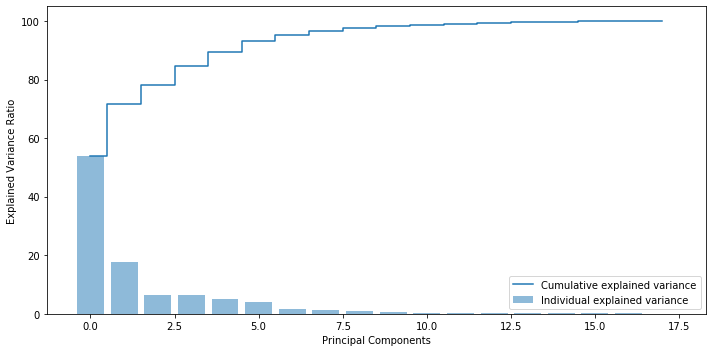

In [109]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

From the above elbow plot we could find that at principal component 7 , the variance of the model is 95%. hence using those and building principle component with that

In [110]:
pca = PCA(n_components=8)
pca.fit(X_stdfeature)
x_reducedfeat = pca.transform(X_stdfeature)

In [111]:
x_reducedfeat.shape

(846, 8)

In [112]:
pca.components_
print(pca.explained_variance_)

[9.70639115 3.21866613 1.16888512 1.13769378 0.88307677 0.69875131
 0.32225756 0.25297907]


In [113]:
#creating train and test data with reduced dimensions
X_trainfeat, X_testfeat, y_trainfeat, y_testfeat = train_test_split(x_reducedfeat, y, test_size=0.30, random_state=2)

In [114]:
param_grid = {'C': [0.01, 0.05, 0.5, 1],'kernel': ['rbf'],  
              'C': [0.01, 0.05, 0.5, 1],'kernel': ['linear']}  
  



In [115]:
gridn = GridSearchCV(clf, param_grid, refit = True, verbose = 3) 
# fitting the model for grid search 
gridn.fit(X_testfeat, y_testfeat) 

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.541, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.706, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.762, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.800, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.776, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.845, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [116]:
# print best parameter after tuning 
print(gridn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridn.best_estimator_) 

{'C': 1, 'kernel': 'linear'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [117]:
clf = SVC(C=1,kernel = 'linear')
clf.fit(X_trainfeat, y_trainfeat)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [118]:
clf.score(X_trainfeat,y_trainfeat)

0.8800675675675675

In [119]:
clf.score(X_testfeat,y_testfeat)

0.8149606299212598

In [120]:
#This looks like overfit model with training accuracy as 97% and test accuracy as 92%

#### The model accuracy is increadsed to 52% from 81% after reducing the noise from the data using PCA

#### Approach 3:Predicting the features from pearson's correlation. Dropping features which are least correlated with class column.
which are circularity,compactness,skweness_about1, skweness_about.2.
Allowing the variables with multicollinearity so tha PCA can be used to reduce the noise in the multicolinear variables.

In [121]:
X_man = vehdfimpmedian.drop(['class','max.length_rectangularity','compactness','skewness_about','skewness_about.1','skewness_about.2','circularity'],axis=1)
y_man = vehdfimpmedian['class']


In [122]:
sc = StandardScaler()
X_std_man =  sc.fit_transform(X_man)          
cov_matrix = np.cov(X_std_man.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.79516215  0.24462154  0.66759792  0.90614687 -0.9123854
   0.89408198  0.87061349  0.87568461  0.70660663 -0.15315629  0.33312625]
 [ 0.79516215  1.00118343  0.65132393  0.46450748  0.77085211 -0.82636872
   0.74502008  0.78711387  0.7722242   0.55142559 -0.30975584  0.49234013]
 [ 0.24462154  0.65132393  1.00118343  0.15047265  0.19442484 -0.29849719
   0.16323988  0.20734569  0.24060039  0.14876723 -0.21244164  0.41622574]
 [ 0.66759792  0.46450748  0.15047265  1.00118343  0.49133933 -0.50477756
   0.48850876  0.40186618  0.51109257  0.39786723 -0.23202139  0.41366325]
 [ 0.90614687  0.77085211  0.19442484  0.49133933  1.00118343 -0.97275069
   0.99092181  0.96201996  0.94107048  0.80082111  0.03409218  0.1189581 ]
 [-0.9123854  -0.82636872 -0.29849719 -0.50477756 -0.97275069  1.00118343
  -0.95011894 -0.94876596 -0.93101355 -0.76722075  0.03191829 -0.2171615 ]
 [ 0.89408198  0.74502008  0.16323988  0.48850876  0.99092181 -0.95011894
   1.001183

In [123]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)


Eigen Vectors 
%s [[ 0.34814781 -0.04144278  0.16705156  0.04711764  0.0876773  -0.0371084
  -0.37385024  0.79848914  0.23571184  0.00316768 -0.06960576 -0.01099959]
 [ 0.31862397 -0.22274533 -0.29381751 -0.05079933  0.06875255 -0.2308786
  -0.14640921 -0.34895015  0.54452167 -0.01063528 -0.24756133  0.44812577]
 [ 0.12520468 -0.32452509 -0.76111189  0.34986457 -0.0189893  -0.08506648
   0.10116024  0.19298836 -0.27139505 -0.00367404  0.0367552  -0.21729292]
 [ 0.2185829  -0.18059574  0.46974659  0.76462389  0.07325538 -0.21986291
   0.04700427 -0.22602796 -0.04920994  0.00144633  0.05087529 -0.04773928]
 [ 0.35592705  0.11623117  0.03829575 -0.1357006   0.08758172 -0.02877775
   0.04878284 -0.04329764 -0.34665048 -0.82306579 -0.14731534  0.08869164]
 [-0.3580432  -0.04447316  0.0259392   0.11008893 -0.11118238 -0.05528077
   0.04767039  0.02026752  0.29808187 -0.23865603 -0.68935992 -0.46680559]
 [ 0.35088718  0.12972861  0.06307388 -0.13646255  0.07850342 -0.04341462
   0.07157357 -0

In [124]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)


[(7.440419090781377, array([ 0.34814781,  0.31862397,  0.12520468,  0.2185829 ,  0.35592705,
       -0.3580432 ,  0.35088718,  0.34599752,  0.34624551,  0.29148434,
       -0.03174498,  0.1012189 ])), (2.2862264545088107, array([-0.04144278, -0.22274533, -0.32452509, -0.18059574,  0.11623117,
       -0.04447316,  0.12972861,  0.12691985,  0.07333421,  0.24861659,
        0.57933901, -0.5995733 ])), (0.9674980306419493, array([ 0.16705156, -0.29381751, -0.76111189,  0.46974659,  0.03829575,
        0.0259392 ,  0.06307388, -0.04004639,  0.0195112 , -0.04124643,
       -0.24408612,  0.12818135])), (0.5900457953515821, array([ 0.04711764, -0.05079933,  0.34986457,  0.76462389, -0.1357006 ,
        0.11008893, -0.13646255, -0.22411585, -0.06551994,  0.15516193,
        0.39241779, -0.0800029 ])), (0.26799641283626, array([ 0.0876773 ,  0.06875255, -0.0189893 ,  0.07325538,  0.08758172,
       -0.11118238,  0.07850342,  0.04875276,  0.22913187, -0.86864037,
        0.37988152,  0.0440416 ])

In [125]:
tot = sum(eigenvalues)
print(tot)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
print('The variance by each eigen vector is', var_exp)
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance by each eigen vector is", cum_var_exp)

12.01420118343196
The variance by each eigen vector is [61.93020224300887, 19.02936715977092, 8.052953466237653, 4.911236180773114, 2.230663601720248, 1.2019540284848362, 0.8928424640670951, 0.6007587897636107, 0.5468789739664708, 0.33331900954544097, 0.22202541110595544, 0.04779867155578104]
Cumulative Variance by each eigen vector is [ 61.93020224  80.9595694   89.01252287  93.92375905  96.15442265
  97.35637668  98.24921914  98.84997793  99.39685691  99.73017592
  99.95220133 100.        ]


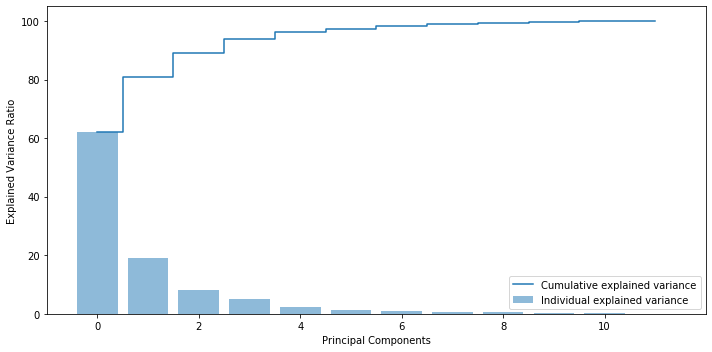

In [126]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [127]:
pca_m = PCA(n_components=5)

In [128]:
pca_m.fit(X_std_man)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [129]:
x_reduced_m = pca_m.transform(X_std_man)

In [130]:
x_reduced_m.shape

(846, 5)

In [131]:
pca_m.components_

array([[-0.34814781, -0.31862397, -0.12520468, -0.2185829 , -0.35592705,
         0.3580432 , -0.35088718, -0.34599752, -0.34624551, -0.29148434,
         0.03174498, -0.1012189 ],
       [-0.04144278, -0.22274533, -0.32452509, -0.18059574,  0.11623117,
        -0.04447316,  0.12972861,  0.12691985,  0.07333421,  0.24861659,
         0.57933901, -0.5995733 ],
       [-0.16705156,  0.29381751,  0.76111189, -0.46974659, -0.03829575,
        -0.0259392 , -0.06307388,  0.04004639, -0.0195112 ,  0.04124643,
         0.24408612, -0.12818135],
       [-0.04711764,  0.05079933, -0.34986457, -0.76462389,  0.1357006 ,
        -0.11008893,  0.13646255,  0.22411585,  0.06551994, -0.15516193,
        -0.39241779,  0.0800029 ],
       [-0.0876773 , -0.06875255,  0.0189893 , -0.07325538, -0.08758172,
         0.11118238, -0.07850342, -0.04875276, -0.22913187,  0.86864037,
        -0.37988152, -0.0440416 ]])

In [132]:
param_grid = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']},
 ]


In [133]:
grid_m = GridSearchCV(clf, param_grid )

In [134]:
X_trainnm,X_testnm,y_trainnm,y_testnm = train_test_split(x_reduced_m,y_man,test_size=0.30,random_state=50)

In [135]:
# fitting the model for grid search 
grid_m.fit(X_trainnm, y_trainnm) 

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
                         {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [136]:
print(grid_m.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_m.best_estimator_) 

{'C': 1, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [137]:
svm1 = SVC(C=1,kernel='rbf')
svm1.fit(X_trainnm,y_trainnm)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [138]:
svm1.score(X_trainnm,y_trainnm)

0.9222972972972973

In [139]:
svm1.score(X_testnm,y_testnm)

0.9251968503937008

In [140]:
#using features obtained from randomforest
CV = model_selection.KFold(n_splits=10, random_state=18)

model_m = SVC(C=1,kernel='rbf')
results = model_selection.cross_val_score(model_m,x_reduced_m,y_man, cv=CV, scoring='accuracy')
print('The cross validated score is',results)
print('The average accuracy of the model is',results.mean())

The cross validated score is [0.89411765 0.94117647 0.92941176 0.91764706 0.92941176 0.90588235
 0.85714286 0.89285714 0.94047619 0.9047619 ]
The average accuracy of the model is 0.9112885154061624


With the manually selected feature, the model accuracy is 92% and accuracy of the cross validated data is 91%. Using Feature selection technique or using randomforest to predict the best feature to improve model score

#### Approach 4: Let us predict the important features  from randomforest algorithm to get the better results 

In [141]:
#forming the parameter 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,25,50,60,70,80],
    'max_features':[0.1,.25,0.5,0.75,1],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [5,10,20,50,100,150]
}

In [142]:
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 5)

In [143]:
#using orginal X and y variables to find the best features
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X, y, test_size=0.30, random_state=2)


In [ ]:
grid_search.fit(X_trainR, y_trainR)

In [687]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'max_features': 0.25,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 150}

In [688]:
modelR = RandomForestClassifier(bootstrap = True,n_estimators = 150,max_depth=25,min_samples_leaf=3)
# Fit on training data
modelR.fit(X_trainR, y_trainR)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [689]:
pd.DataFrame(modelR.feature_importances_, columns = ["Imp"], index = X_train.columns)

Imp
compactness                  0.034307
circularity                  0.032652
distance_circularity         0.069124
radius_ratio                 0.033949
pr.axis_aspect_ratio         0.052865
max.length_aspect_ratio      0.151583
scatter_ratio                0.070139
elongatedness                0.062909
pr.axis_rectangularity       0.040961
max.length_rectangularity    0.084007
scaled_variance              0.088760
scaled_variance.1            0.093051
scaled_radius_of_gyration    0.023650
scaled_radius_of_gyration.1  0.042251
skewness_about               0.014494
skewness_about.1             0.017437
skewness_about.2             0.030612
hollows_ratio                0.057248


From the above we could find that the features having least importance are 'skewness_about','skewness_about.1','pr.axis_rectangularity','scaled_radius_of_gyration','compactness'
which should be dropped from the data


In [529]:
#forming the data obtained from randomforestclassfier as best feature . Using the feature with importance greater than 0.035 
X1= vehdfimpmedian.drop(['class','radius_ratio','circularity','skewness_about','scaled_radius_of_gyration','skewness_about.1'],axis=1)
y1= vehdfimpmedian['class'] 

In [530]:
X1.head(10)

compactness  distance_circularity  pr.axis_aspect_ratio  \
0         95.0                  83.0                  72.0   
1         91.0                  84.0                  57.0   
2        104.0                 106.0                  66.0   
3         93.0                  82.0                  63.0   
4         85.0                  70.0                  61.0   
5        107.0                 106.0                  50.0   
6         97.0                  73.0                  65.0   
7         90.0                  66.0                  65.0   
8         86.0                  62.0                  61.0   
9         93.0                  98.0                  62.0   

   max.length_aspect_ratio  scatter_ratio  elongatedness  \
0                     10.0          162.0           42.0   
1                      9.0          149.0           45.0   
2                     10.0          207.0           32.0   
3                      9.0          144.0           46.0   
4                      8.0          149.0           45.0   
5                      6.0          255.0           26.0   
6                      6.0          153.0           42.0   
7                      9.0          137.0           48.0   
8                      7.0          122.0           54.0   
9                     11.0          183.0           36.0   

   pr.axis_rectangularity  max.length_rectangularity  scaled_variance  \
0                    20.0                      159.0            176.0   
1                    19.0                      143.0            170.0   
2                    23.0                      158.0            223.0   
3                    19.0                      143.0            160.0   
4                    19.0                      144.0            241.0   
5                    28.0                      169.0            280.0   
6                    19.0                      143.0            176.0   
7                    18.0                      146.0            162.0   
8                    17.0                      127.0            141.0   
9                    22.0                      146.0            202.0   

   scaled_variance.1  scaled_radius_of_gyration.1  skewness_about.2  \
0              379.0                         70.0             187.0   
1              330.0                         72.0             189.0   
2              635.0                         73.0             188.0   
3              309.0                         63.0             199.0   
4              325.0                         71.5             180.0   
5              363.5                         71.5             181.0   
6              361.0                         66.0             200.0   
7              281.0                         67.0             193.0   
8              223.0                         64.0             200.0   
9              505.0                         64.0             195.0   

   hollows_ratio  
0          197.0  
1          199.0  
2          196.0  
3          207.0  
4          183.0  
5          183.0  
6          204.0  
7          202.0  
8          208.0  
9          204.0

In [531]:
# We transform (centralize) the entire X (independent variable data) to StandardScaler through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std2 =  sc.fit_transform(X1)          
cov_matrix = np.cov(X_std2.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.79086299  0.1930925   0.50051942  0.81358214 -0.78968322
   0.81465658  0.67694334  0.77078163  0.78746651 -0.22631465  0.29889034
   0.36598446]
 [ 0.79086299  1.00118343  0.24462154  0.66759792  0.90614687 -0.9123854
   0.89408198  0.77544391  0.87061349  0.87568461 -0.15315629  0.14627113
   0.33312625]
 [ 0.1930925   0.24462154  1.00118343  0.15047265  0.19442484 -0.29849719
   0.16323988  0.14776643  0.20734569  0.24060039 -0.21244164  0.401356
   0.41622574]
 [ 0.50051942  0.66759792  0.15047265  1.00118343  0.49133933 -0.50477756
   0.48850876  0.64347365  0.40186618  0.51109257 -0.23202139  0.08389276
   0.41366325]
 [ 0.81358214  0.90614687  0.19442484  0.49133933  1.00118343 -0.97275069
   0.99092181  0.81004084  0.96201996  0.94107048  0.03409218  0.00563439
   0.1189581 ]
 [-0.78968322 -0.9123854  -0.29849719 -0.50477756 -0.97275069  1.00118343
  -0.95011894 -0.77677186 -0.94876596 -0.93101355  0.03191829 -0.11526213
  -0.2171615 ]
 [ 

In [532]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.3164745   0.08111606  0.05763769 -0.24347068  0.63185063  0.24801429
   0.57588755 -0.07194555  0.01777585  0.06597772 -0.1648088   0.0313119
   0.01684215]
 [ 0.34745618  0.02040092  0.09231874  0.03938402 -0.27951265 -0.15275627
   0.07895936 -0.33434571 -0.00147565  0.77869068  0.09825611  0.14099896
  -0.11577733]
 [ 0.10517816  0.25371676 -0.71597718  0.58372366 -0.00369249  0.2134359
   0.14878754 -0.01050073 -0.00830521  0.02070746  0.04996114 -0.01917127
   0.00554873]
 [ 0.22938212  0.10069009  0.55864934  0.59396789 -0.06404309 -0.16274117
   0.27151933 -0.01532743 -0.01198906 -0.34534621  0.15389554  0.1429833
  -0.06541189]
 [ 0.35306283 -0.1052735  -0.07084432 -0.1247988  -0.11340797  0.00749907
  -0.01778353  0.00225968 -0.829982   -0.15547941  0.07528408 -0.29941218
  -0.1485671 ]
 [-0.35250161  0.04089376  0.13735619  0.07017988  0.19021554  0.13605796
   0.09020922  0.05033351 -0.25942944  0.25254946  0.6261824  -0.07133166
   0.50659257]
 [ 0.34

In [963]:
#Step 3: Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(7.5304477408916135, array([ 0.3164745 ,  0.34745618,  0.10517816,  0.22938212,  0.35306283,
       -0.35250161,  0.34932003,  0.30783014,  0.33880699,  0.34363828,
       -0.04034052,  0.05585871,  0.11009029])), (2.8899889137614263, array([ 0.08111606,  0.02040092,  0.25371676,  0.10069009, -0.1052735 ,
        0.04089376, -0.1174173 , -0.12876894, -0.10985312, -0.06996554,
       -0.51929909,  0.54305035,  0.54206283])), (0.907341124419245, array([ 0.05763769,  0.09231874, -0.71597718,  0.55864934, -0.07084432,
        0.13735619, -0.04305728,  0.17317091, -0.15602334, -0.08190439,
       -0.22139719, -0.13034607,  0.10323072])), (0.7432605680415294, array([-0.24347068,  0.03938402,  0.58372366,  0.59396789, -0.1247988 ,
        0.07017988, -0.13566097,  0.2662767 , -0.18543993, -0.05880938,
        0.19524271, -0.24146388,  0.03951696])), (0.26252518768108524, array([ 0.63185063, -0.27951265, -0.00369249, -0.06404309, -0.11340797,
        0.19021554, -0.07423685,  0.415223  , -0.1

In [964]:
tot = sum(eigenvalues)
print(tot)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
print('The variance by each eigen vector is', var_exp)
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance by each eigen vector is", cum_var_exp)

13.015384615384615
The variance by each eigen vector is [57.858050018670795, 22.20440654781238, 6.971297055230606, 5.710630841926644, 2.0170374940036098, 1.55089010835766, 1.4369412554047638, 0.816288825180743, 0.5321561214126812, 0.3728010170001623, 0.2847839982980768, 0.2013162924704352, 0.043400424231438875]
Cumulative Variance by each eigen vector is [ 57.85805002  80.06245657  87.03375362  92.74438446  94.76142196
  96.31231207  97.74925332  98.56554215  99.09769827  99.47049929
  99.75528328  99.95659958 100.        ]


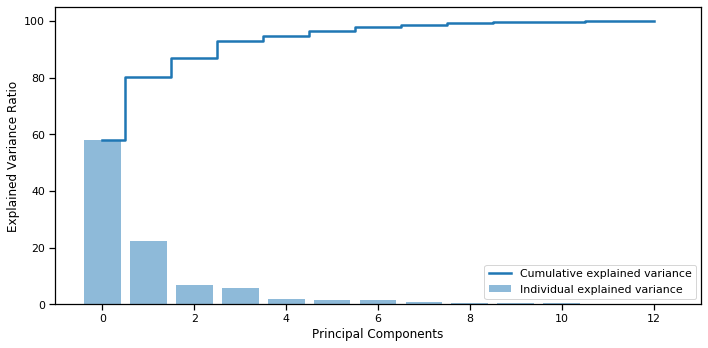

In [965]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [966]:
pca2 = PCA(n_components=6)

In [967]:
pca2.fit(X_std2)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [968]:
x_reduced2 = pca2.transform(X_std2)

In [969]:
x_reduced2.shape

(846, 6)

In [970]:
pca2.components_


array([[-0.3164745 , -0.34745618, -0.10517816, -0.22938212, -0.35306283,
         0.35250161, -0.34932003, -0.30783014, -0.33880699, -0.34363828,
         0.04034052, -0.05585871, -0.11009029],
       [-0.08111606, -0.02040092, -0.25371676, -0.10069009,  0.1052735 ,
        -0.04089376,  0.1174173 ,  0.12876894,  0.10985312,  0.06996554,
         0.51929909, -0.54305035, -0.54206283],
       [-0.05763769, -0.09231874,  0.71597718, -0.55864934,  0.07084432,
        -0.13735619,  0.04305728, -0.17317091,  0.15602334,  0.08190439,
         0.22139719,  0.13034607, -0.10323072],
       [ 0.24347068, -0.03938402, -0.58372366, -0.59396789,  0.1247988 ,
        -0.07017988,  0.13566097, -0.2662767 ,  0.18543993,  0.05880938,
        -0.19524271,  0.24146388, -0.03951696],
       [-0.63185063,  0.27951265,  0.00369249,  0.06404309,  0.11340797,
        -0.19021554,  0.07423685, -0.415223  ,  0.19509542,  0.0603975 ,
        -0.41524787, -0.27323812, -0.05251473],
       [ 0.24801429, -0.152756

In [971]:
print(pca2.explained_variance_)

[7.53044774 2.88998891 0.90734112 0.74326057 0.26252519 0.20185431]


In [1008]:
from sklearn import model_selection

X_trainnew, X_testnnew, y_trainnew, y_testnnew = train_test_split(x_reduced2, y1, test_size=0.30, random_state=42)

In [1009]:
#finding best parameters for the model
# defining parameter range 
param_grid = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']},
 ]
#param_grid_1 = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
 # {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 #]
  


In [1010]:
gridn = GridSearchCV(clf, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridn.fit(X_trainnew, y_trainnew) 

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.808, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.758, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.837, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.838, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.813, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.872, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
                         {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [1011]:
# print best parameter after tuning 
print(gridn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridn.best_estimator_) 

{'C': 1, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [1012]:
modelnewR = SVC(C=1, kernel='rbf',probability= True)

In [1013]:
modelnewR.fit(X_trainnew,y_trainnew)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [1014]:
modelnewR.score(X_trainnew,y_trainnew)

0.956081081081081

In [1096]:
modelnewR.score(X_testnnew,y_testnnew)

0.952755905511811

#### After selecting appropriate features we could see that model accuracy increased to 95% 

In [1016]:
#classfiication report is
modelnew_predictions = modelnewR.predict(X_testnnew) 
  
# print classification report 
print(classification_report(y_testnnew, modelnew_predictions)) 

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        78
         1.0       0.95      0.96      0.95       118
         2.0       0.95      0.93      0.94        58

    accuracy                           0.95       254
   macro avg       0.95      0.95      0.95       254
weighted avg       0.95      0.95      0.95       254



In [1017]:
#The f1 score is 96% 

Confusion Matrix For : 
 Confusion matrix for reduced dimension [[ 75   2   1]
 [  3 113   2]
 [  0   4  54]]


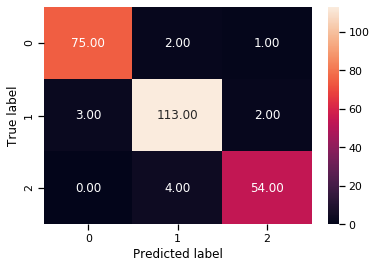

In [1018]:
#Confusion matrix is 
cm = confusion_matrix(y_testnnew, modelnew_predictions )
print("Confusion Matrix For :", "\n",'Confusion matrix for reduced dimension',cm )
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0, 1,2] , yticklabels = [0, 1,2] )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [1107]:
#using features obtained from randomforest
cv = model_selection.KFold(n_splits=10, random_state=10)

model1 = SVC(C=1,kernel='rbf')
results = model_selection.cross_val_score(model1,x_reduced2,y, cv=cv, scoring='f1_weighted')
print('The cross validated score is',results)
print('The average accuracy of the model is',results.mean())

The cross validated score is [0.90566255 0.92936247 0.95261438 0.96480687 0.96464129 0.94051699
 0.92786658 0.94057947 0.96407063 0.96432932]
The average accuracy of the model is 0.9454450552309492


#### we could find that model performs well with the appropriately selected features and PCA. We could see the accuracy of the model is 95%  and f1-score as 96% with properly selected features from Randomforest. The average accuracy obtained during cross fold validation is 94%

#### Approach4 : using feature selection as well to predict the featuress see the accuracy of the model and compare the results obtained from random forest. Using RFE algorithm to find out the best feature

In [1020]:
#Please ignore the below
#using atleast 70% of feature in predicting target variable
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#svm = SVC()
#sfs1 = SFS(svm, 
 #          k_features=14,
  #         forward=True, 
   #        floating=False, 
    #       scoring='f1_weighted',
     #      cv=5)
#sfs1 = sfs1.fit(X_train, y_train)

#print('Selected features:', sfs1.k_feature_idx_)


In [613]:
#recursive feature selection to see the important features
from sklearn.feature_selection import RFE
svmnew = SVC(kernel='linear')
#selecting 80% of features in building model
rfe = RFE(svmnew,14)
result = rfe.fit(X, y)
#var = result.support_
print("Selected Features:",result.n_features_) 
print("Feature Ranking:",result.ranking_)
print("feature selected:",result )

Selected Features: 14
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 3 4 5 1 2 1 1]
feature selected: RFE(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                  decision_function_shape='ovr', degree=3,
                  gamma='auto_deprecated', kernel='linear', max_iter=-1,
                  probability=False, random_state=None, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=14, step=1, verbose=0)


In [1072]:
columnsavail = list(X.columns)
print('availablecolumns',columnsavail)

availablecolumns ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio']


In [1]:
#using the variables with Rank 1
feat_columns  =  ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance','skewness_about.2','scaled_radius_of_gyration.1', 'hollows_ratio']

In [1074]:
#please ignore the below
#columnList = list(X_train.columns)
#feat_cols = list(sfs1.k_feature_idx_)
#print(feat_cols)

In [1075]:
#subsetColumnList = [columnList[i] for i in feat_cols] 
#print(subsetColumnList)

In [1076]:
#building PCA components and SVM model with the selected features from features selection to find the accuracy
Xnew  = vehdfimpmedian[feat_columns]
ynew = vehdfimpmedian['class']


In [1077]:
sc = StandardScaler()
X_stdfeaturenew =  sc.fit_transform(Xnew)          
cov_matrix = np.cov(X_stdfeaturenew.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.29889034
  -0.22631465  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846 -0.10455005
   0.1219982   0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.14627113
  -0.15315629  0.33312625]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.40632957
  -0.30975584  0.49234013]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.15047265
   0.19442484 -0.29849719  0.16323988  0.14776643  0.20734569  0.401356
  -0.21244164  0.41622574]
 [ 0.50051942  0.5611334   0.66759792  0.46450748  0.15047265  1.00118343
   0.49133933 -0.50477756  0.488

In [1078]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.30200791 -0.06178417  0.10947138  0.26832409 -0.2247548   0.6243424
  -0.5808502  -0.08517785  0.06507281  0.02016329 -0.03821137  0.07902477
   0.15239666 -0.02147006]
 [ 0.30728536  0.16532035  0.04787599 -0.20294715 -0.50006532 -0.25961723
   0.02363177 -0.04675085  0.15709279  0.02152316  0.00112072 -0.47063065
   0.28454058 -0.43238352]
 [ 0.33250625 -0.0022583   0.104899    0.00868609  0.29970212 -0.03547035
   0.16849146 -0.72272545  0.43832641 -0.00112622 -0.1421835   0.00553379
  -0.14133682  0.06480831]
 [ 0.30322798 -0.17555589 -0.31808948 -0.03941073  0.18528747 -0.07667489
  -0.12267924  0.40615846  0.47718961 -0.00305846  0.30502653  0.19513629
  -0.30105751 -0.323727  ]
 [ 0.11844498 -0.26082813 -0.68423676 -0.4952379  -0.00365235  0.0551354
  -0.19198071 -0.21318505 -0.22862318 -0.00760166 -0.12166727 -0.08951704
   0.08256541  0.19282539]
 [ 0.22201979 -0.0694884   0.49869608 -0.58696041  0.36620909  0.23532045
  -0.02136419  0.29153945 -0.092752

In [1079]:
#Step 3: Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(8.14608086761126, array([ 0.30200791,  0.30728536,  0.33250625,  0.30322798,  0.11844498,
        0.22201979,  0.33524214, -0.33673923,  0.3311916 ,  0.29908969,
        0.32344839,  0.06186397, -0.04626358,  0.11413969])), (3.036308208270575, array([-0.06178417,  0.16532035, -0.0022583 , -0.17555589, -0.26082813,
       -0.0694884 ,  0.11581405, -0.0512116 ,  0.12845106,  0.1572953 ,
        0.11528322, -0.52767104,  0.49812275, -0.51772265])), (1.011178862850669, array([ 0.10947138,  0.04787599,  0.104899  , -0.31808948, -0.68423676,
        0.49869608, -0.04209338,  0.10168797, -0.01639384,  0.1706739 ,
       -0.13021157, -0.03150566, -0.26557567,  0.16331791])), (0.7729557018593998, array([ 0.26832409, -0.20294715,  0.00868609, -0.03941073, -0.4952379 ,
       -0.58696041,  0.17936441, -0.13173851,  0.18766867, -0.27290897,
        0.24688597,  0.22389686, -0.14867462, -0.05468812])), (0.33245153443874087, array([-0.2247548 , -0.50006532,  0.29970212,  0.18528747, -0.00365235,
 

In [1080]:
tot = sum(eigenvalues)
print(tot)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
print('The variance by each eigen vector is', var_exp)
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance by each eigen vector is", cum_var_exp)

14.016568047337268
The variance by each eigen vector is [58.11751378868221, 21.662279939113795, 7.214168685484769, 5.514586018838174, 2.3718468980136462, 1.7077824041293026, 1.4170185652293097, 0.5250555755290409, 0.5004973982535261, 0.3258258548737639, 0.23577949372855464, 0.2020203734410518, 0.16464111584373242, 0.04098388883911424]
Cumulative Variance by each eigen vector is [ 58.11751379  79.77979373  86.99396241  92.50854843  94.88039533
  96.58817773  98.0051963   98.53025188  99.03074927  99.35657513
  99.59235462  99.794375    99.95901611 100.        ]


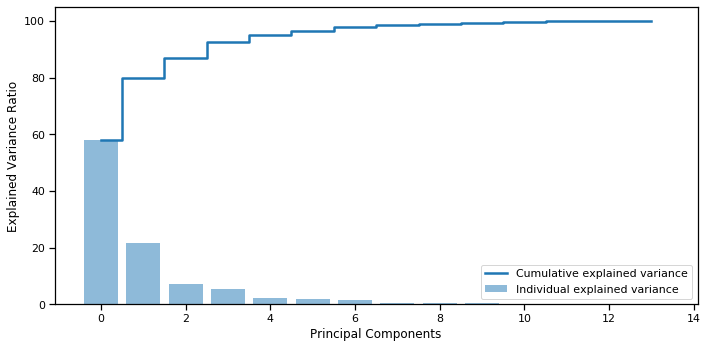

In [1081]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [1082]:
pca = PCA(n_components=6)
pca.fit(X_stdfeaturenew)
x_reducedfeat1 = pca.transform(X_stdfeaturenew)

x_reducedfeat1.shape

pca.components_
print(pca.explained_variance_)

[8.14608087 3.03630821 1.01117886 0.7729557  0.33245153 0.23937248]


In [1083]:
X_trainnewfeat, X_testnewfeat, y_trainnewfeat, y_testnewfeat = train_test_split(x_reducedfeat1, y, test_size=0.30, random_state=10)
#clf = SVC()
#clf.fit(X_trainnew, y_trainnew)

#clf.score(X_testnew,y_testnew)

In [1084]:
#finding best parameters for the model
# defining parameter range 
param_grid = {'C': [0.01, 0.05, 0.5, 1],  
              
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_trainnewfeat, y_trainnewfeat) 

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.515, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.513, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.513, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.778, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.807, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.807, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [1085]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [1086]:
modelnewfeat = SVC(C=1, kernel='rbf')

In [1087]:
modelnewfeat.fit(X_trainnewfeat,y_trainnewfeat)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [1088]:
modelnewfeat.score(X_trainnewfeat,y_trainnewfeat)

0.9594594594594594

In [1089]:
modelnewfeat.score(X_testnewfeat,y_testnewfeat)

0.952755905511811

In [1090]:
modelnew_predictions_feat = modelnewfeat.predict(X_testnewfeat) 
  
# print classification report 
print(classification_report(y_testnewfeat, modelnew_predictions_feat)) 

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        71
         1.0       0.95      0.97      0.96       125
         2.0       0.93      0.91      0.92        58

    accuracy                           0.95       254
   macro avg       0.95      0.95      0.95       254
weighted avg       0.95      0.95      0.95       254



Confusion Matrix For : 
 [[ 68   3   0]
 [  0 121   4]
 [  1   4  53]]


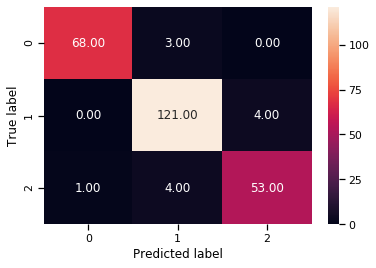

In [1091]:
cm1 = confusion_matrix(y_testnewfeat, modelnew_predictions_feat )
print("Confusion Matrix For :", "\n",cm1 )
sns.heatmap(cm1, annot=True,  fmt='.2f', xticklabels = [0, 1,2] , yticklabels = [0,1,2] )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [1323]:
#cross fold validation obtained from features obtained from feature selection
cv = model_selection.KFold(n_splits=10, random_state=39)

model2 = SVC(C=1, kernel='rbf')
results = model_selection.cross_val_score(model2,x_reducedfeat1,y, cv=cv, scoring='accuracy')
print(results)
print('The average accuracy of the model is',results.mean())

[0.92941176 0.94117647 0.95294118 0.97647059 0.95294118 0.97647059
 0.9047619  0.96428571 0.95238095 0.96428571]
The average accuracy of the model is 0.9515126050420166


The SVM model accuracy with PCA is 95% with Crossfold validation

KNN: 0.932625 (0.028924)
LR: 0.827926 (0.051554)
NB: 0.821321 (0.025652)
svm: 0.951179 (0.021536)


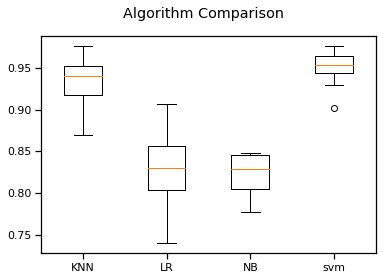

In [1093]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('svm', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1_weighted'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=5)
    cv_results = model_selection.cross_val_score(model, x_reducedfeat1, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the above cross fold validation we could predict that SVM is better model with accuracy of 95%.

Conclusion:
    The model performed poorly without PCA and selecting the right feature with the accuracy of 53%
    The model performace was better with all the features and reducing the dimensionality by PCA which was 84%
    The manual prediction of the feature which are correlated with class and using PCA to reduce multicolinearity also helps in increasing the cross validated score to 92%
    The accuracy of the model from cross fold validation increased to 94% by selecting the features obtained from randomforestclassifier and reducing the multicollinearity using PCA and using radial basel SVM functionality
    Also we tried using feature selection(RFE) to observe the accuracy for reference purpose, which also resulted in 95% f1-weighted score
    Model performed quite well with the features obtained from RandomForest as well as feature selection.
    

From all this we could conclude that model performed well with the features selected from recursive feature elimination with f-1 scoe as 97% and average accuracy as 95%